# Importing Libraries

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
pd.set_option("display.max_columns",30)
pd.set_option("display.max_colwidth",None)
import warnings
warnings.filterwarnings("ignore")

# Project :
## AI Tools Usage Among Global High School Students - EDA Analysis

In [233]:
df=pd.read_csv(r"C:\Users\user\Desktop\AI Tools Usage Among Global High School Students\global_ai_tools_students_use.csv")

In [234]:
df.head()

,student_id,age,gender,country,grade,uses_ai_for_study,uses_chatgpt,uses_gemini,uses_grammarly,uses_quillbot,uses_notion_ai,uses_phind,uses_edu_chat,uses_other,usefulness_chatgpt,usefulness_gemini,usefulness_grammarly,usefulness_quillbot,usefulness_notion_ai,usefulness_phind,usefulness_edu_chat,usefulness_other
0,S0001,17,Female,India,12th,True,False,False,False,False,True,False,False,True,NaN,NaN,NaN,NaN,6.0,NaN,NaN,6.0
1,S0002,18,Female,Canada,10th,True,False,True,False,True,False,False,False,False,NaN,9.0,NaN,10.0,NaN,NaN,NaN,NaN
2,S0003,16,Male,UK,12th,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S0004,18,Female,UK,10th,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S0005,18,Male,USA,11th,True,False,False,True,False,False,False,True,False,NaN,NaN,10.0,NaN,NaN,NaN,8.0,NaN


# Data Info

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            500 non-null    object 
 1   age                   500 non-null    int64  
 2   gender                500 non-null    object 
 3   country               500 non-null    object 
 4   grade                 500 non-null    object 
 5   uses_ai_for_study     500 non-null    bool   
 6   uses_chatgpt          500 non-null    bool   
 7   uses_gemini           500 non-null    bool   
 8   uses_grammarly        500 non-null    bool   
 9   uses_quillbot         500 non-null    bool   
 10  uses_notion_ai        500 non-null    bool   
 11  uses_phind            500 non-null    bool   
 12  uses_edu_chat         500 non-null    bool   
 13  uses_other            500 non-null    bool   
 14  usefulness_chatgpt    115 non-null    float64
 15  usefulness_gemini     1

In [236]:
df.shape

(500, 22)

# Data Handling & Cleaning

In [237]:
df.columns

Index(['student_id', 'age', 'gender', 'country', 'grade', 'uses_ai_for_study',
       'uses_chatgpt', 'uses_gemini', 'uses_grammarly', 'uses_quillbot',
       'uses_notion_ai', 'uses_phind', 'uses_edu_chat', 'uses_other',
       'usefulness_chatgpt', 'usefulness_gemini', 'usefulness_grammarly',
       'usefulness_quillbot', 'usefulness_notion_ai', 'usefulness_phind',
       'usefulness_edu_chat', 'usefulness_other'],
      dtype='object')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            500 non-null    object 
 1   age                   500 non-null    int64  
 2   gender                500 non-null    object 
 3   country               500 non-null    object 
 4   grade                 500 non-null    object 
 5   uses_ai_for_study     500 non-null    bool   
 6   uses_chatgpt          500 non-null    bool   
 7   uses_gemini           500 non-null    bool   
 8   uses_grammarly        500 non-null    bool   
 9   uses_quillbot         500 non-null    bool   
 10  uses_notion_ai        500 non-null    bool   
 11  uses_phind            500 non-null    bool   
 12  uses_edu_chat         500 non-null    bool   
 13  uses_other            500 non-null    bool   
 14  usefulness_chatgpt    115 non-null    float64
 15  usefulness_gemini     1

In [239]:
cols = [
    "usefulness_chatgpt", "usefulness_gemini", "usefulness_grammarly",
    "usefulness_quillbot", "usefulness_notion_ai", "usefulness_phind",
    "usefulness_edu_chat", "usefulness_other"
]

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Filling nan values

In [240]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [241]:
df.drop(columns=["student_id"],inplace=True) # Removing Columns For Better Readability

# EDA & Visualization

## Histogram Distribution

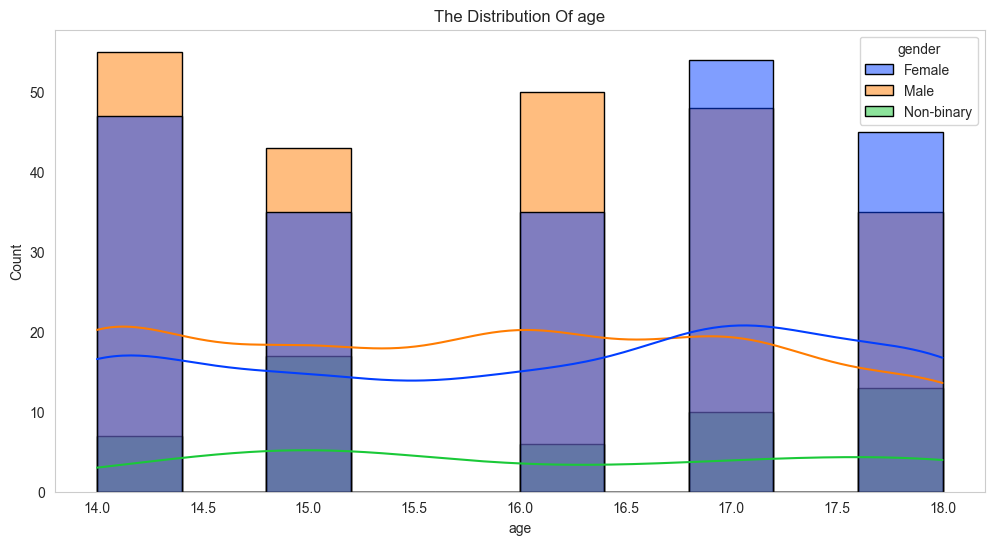

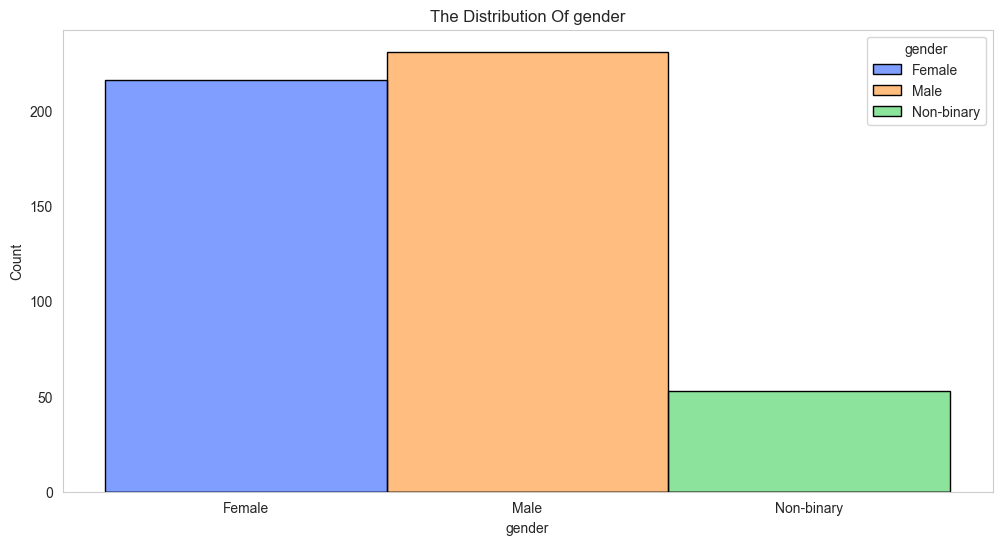

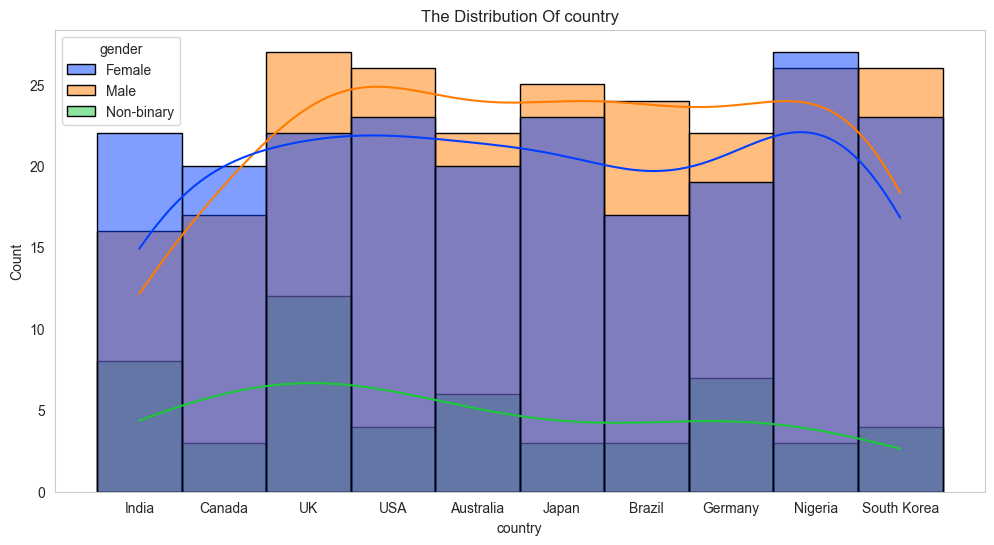

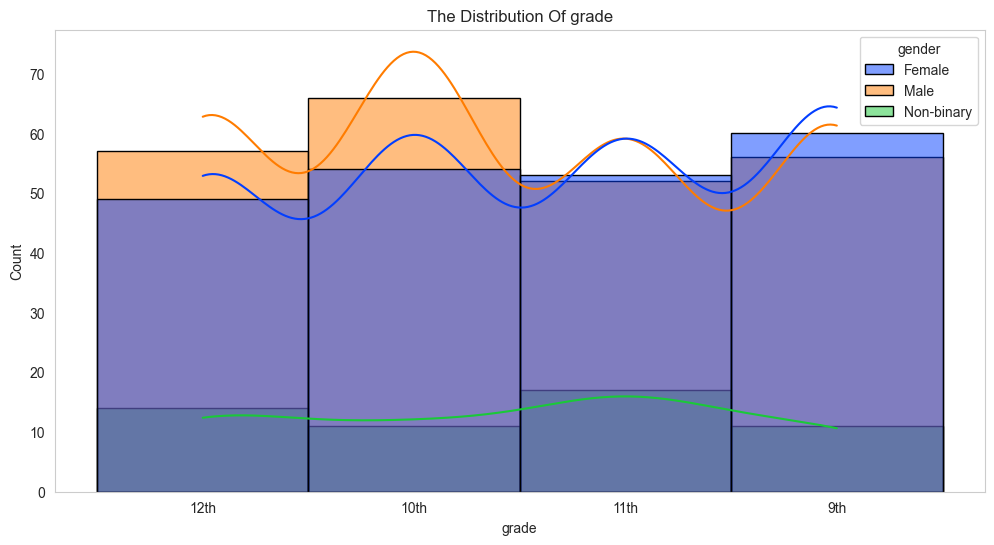

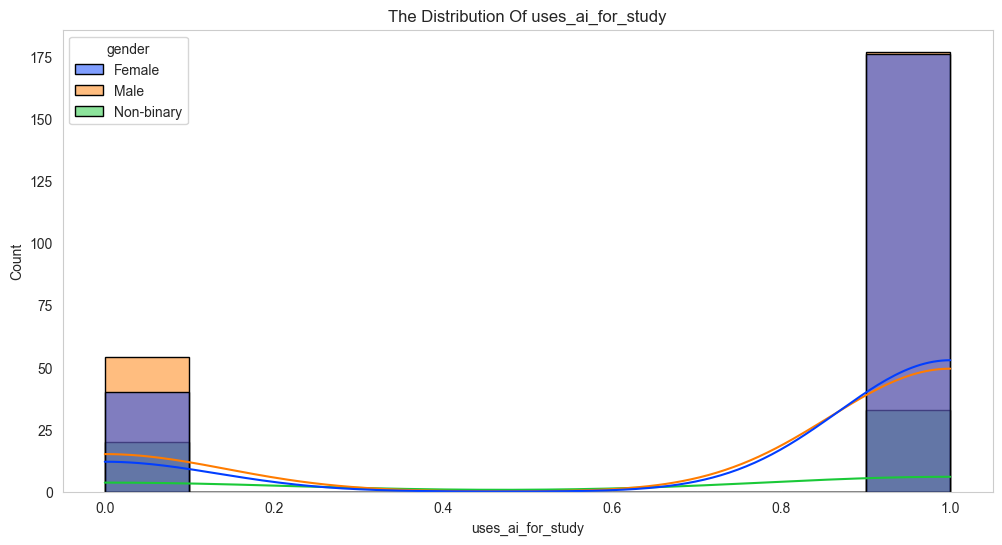

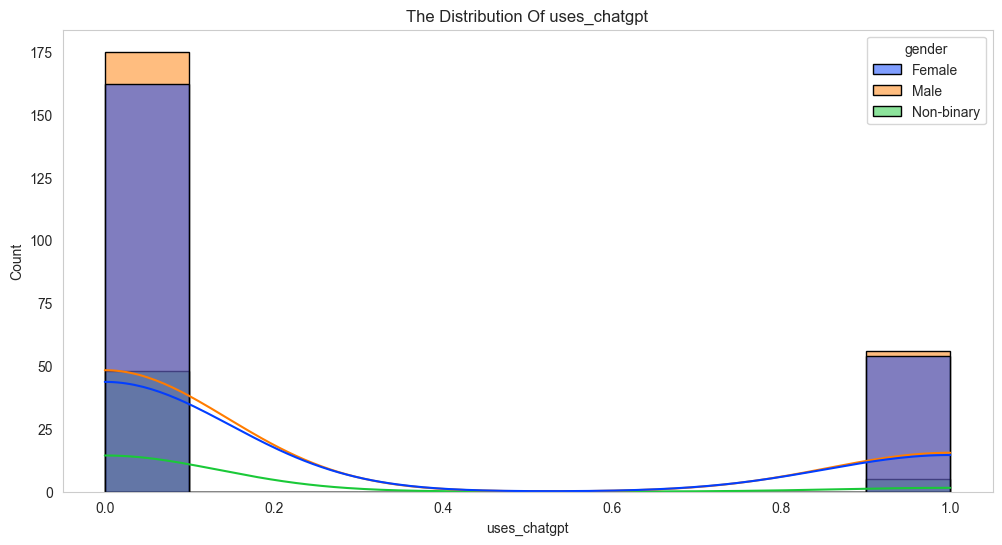

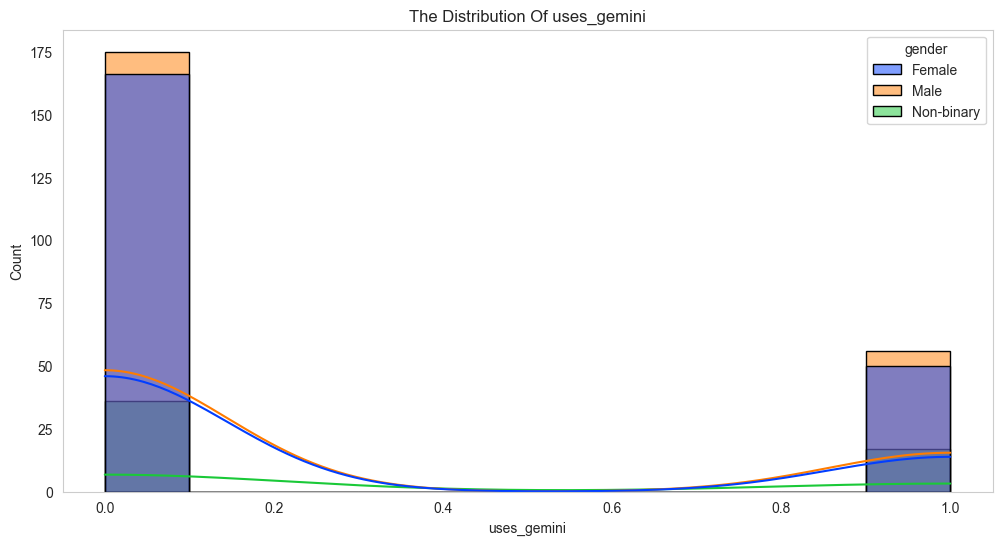

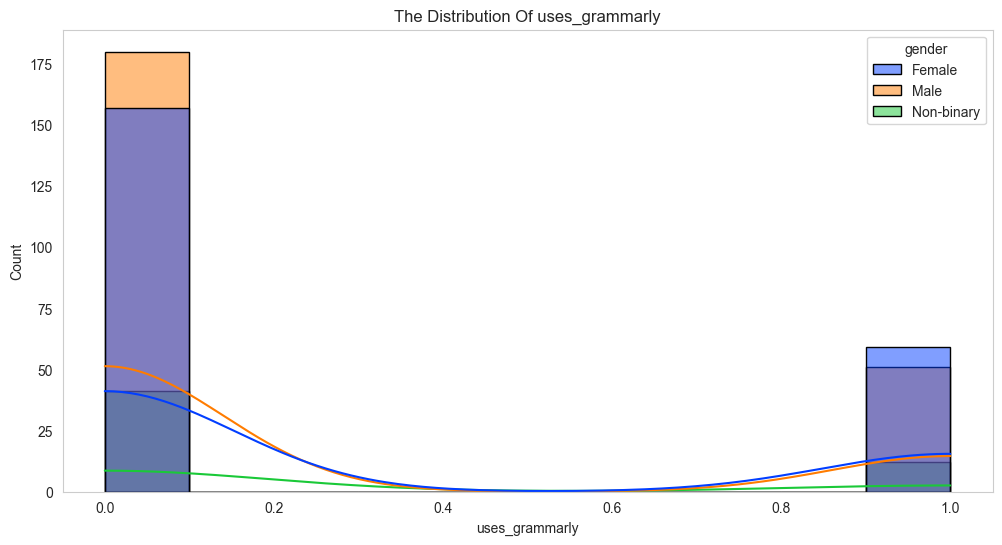

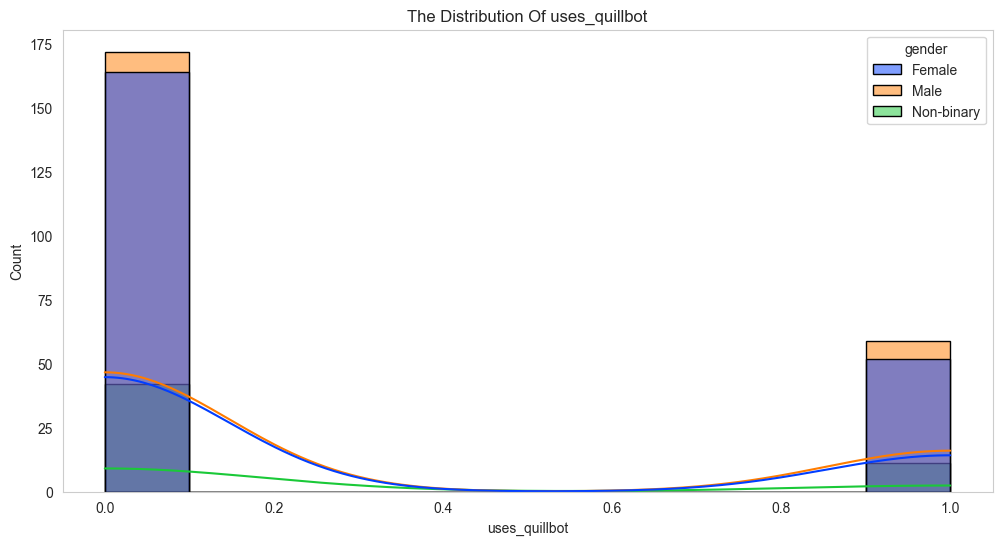

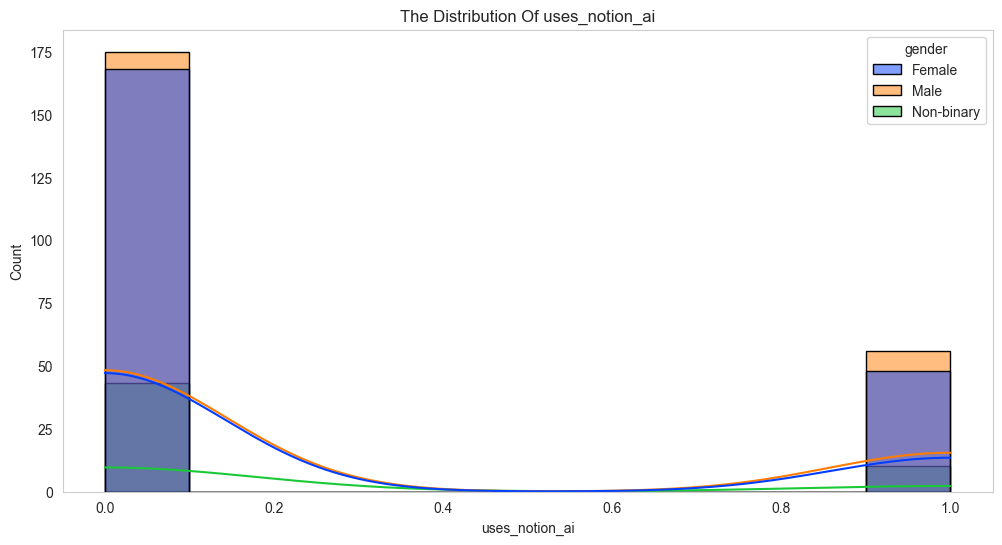

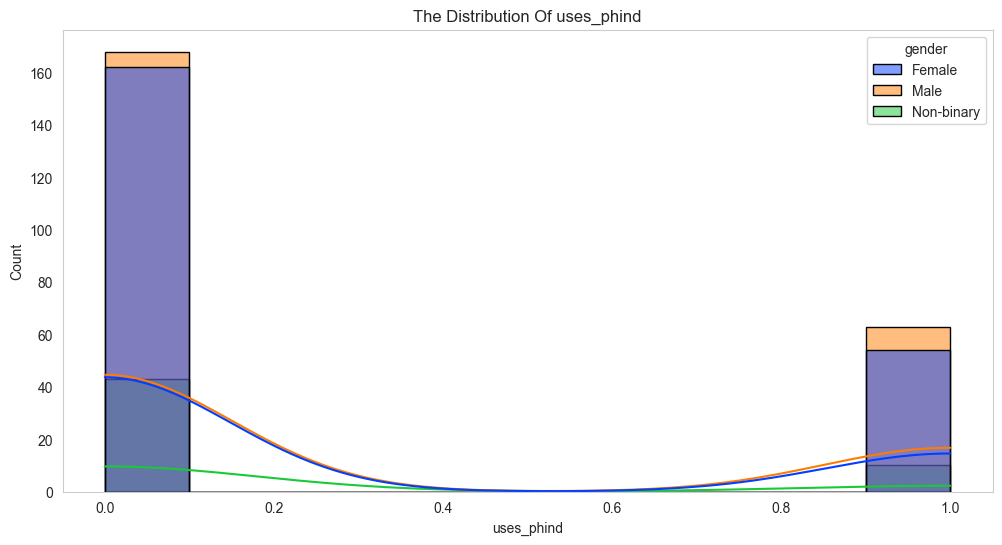

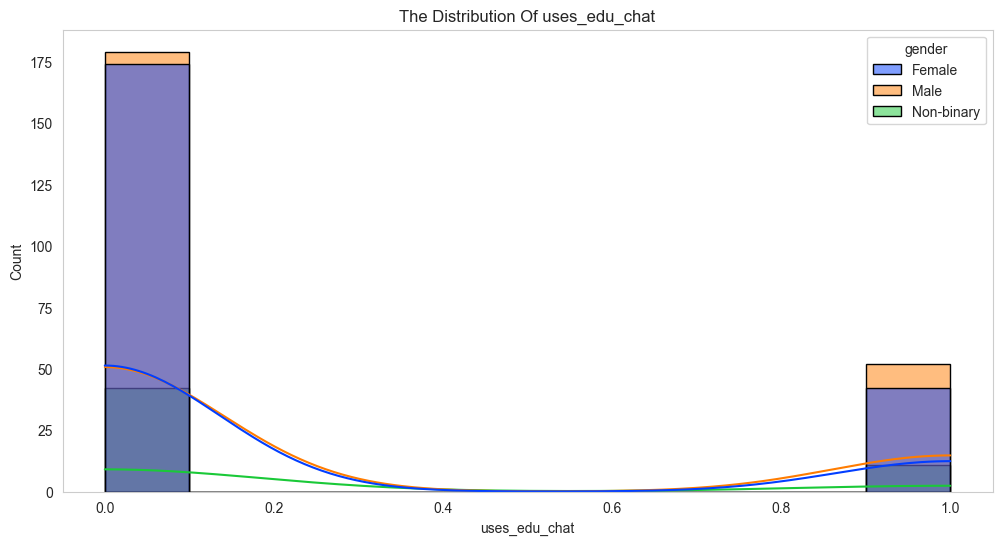

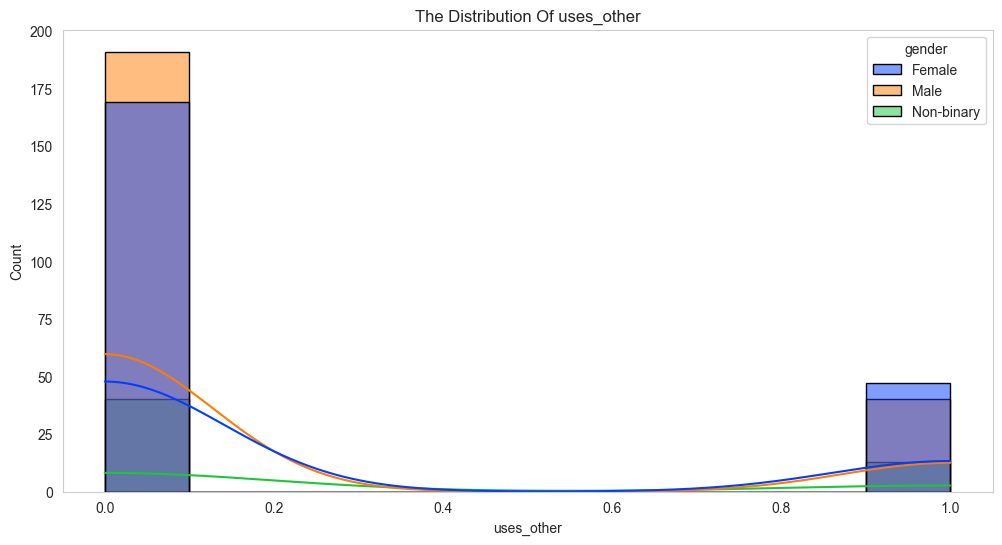

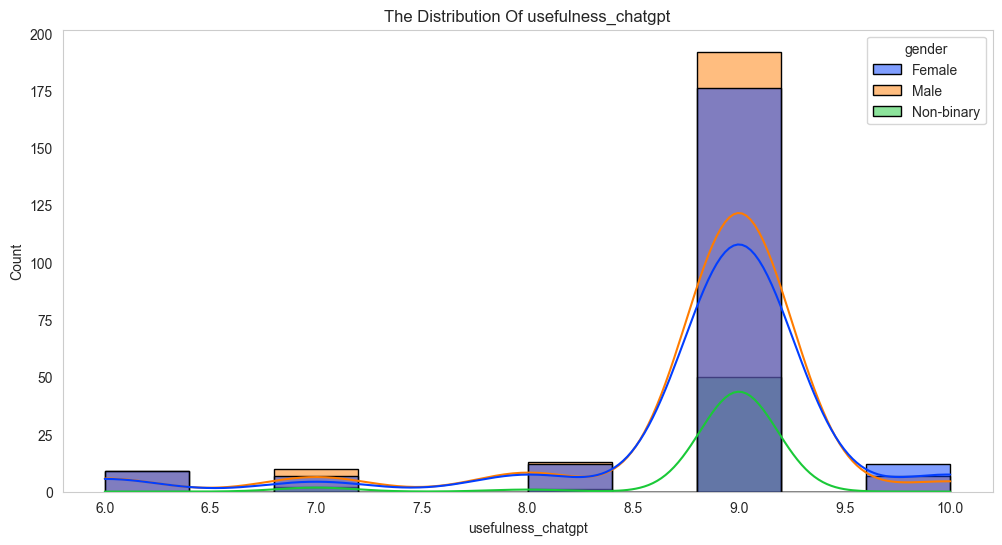

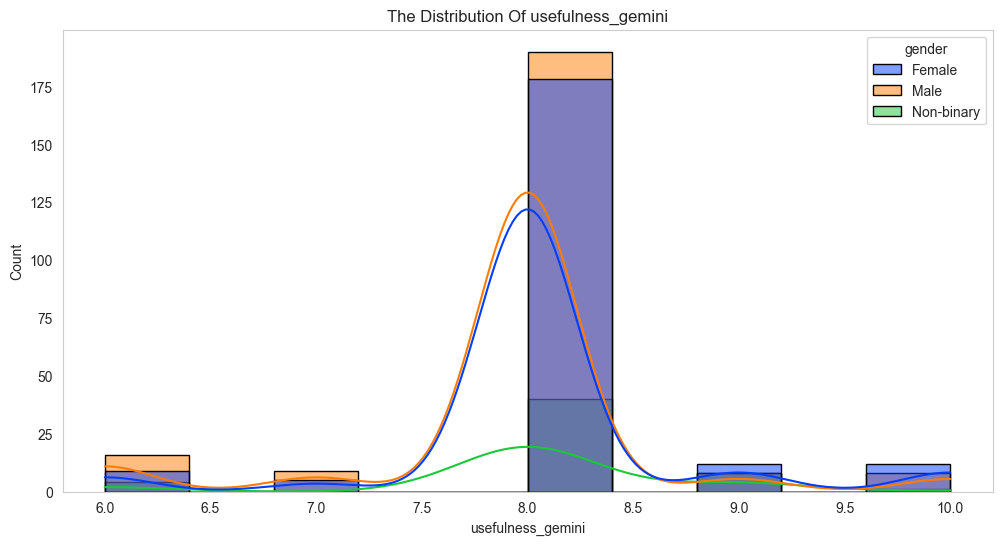

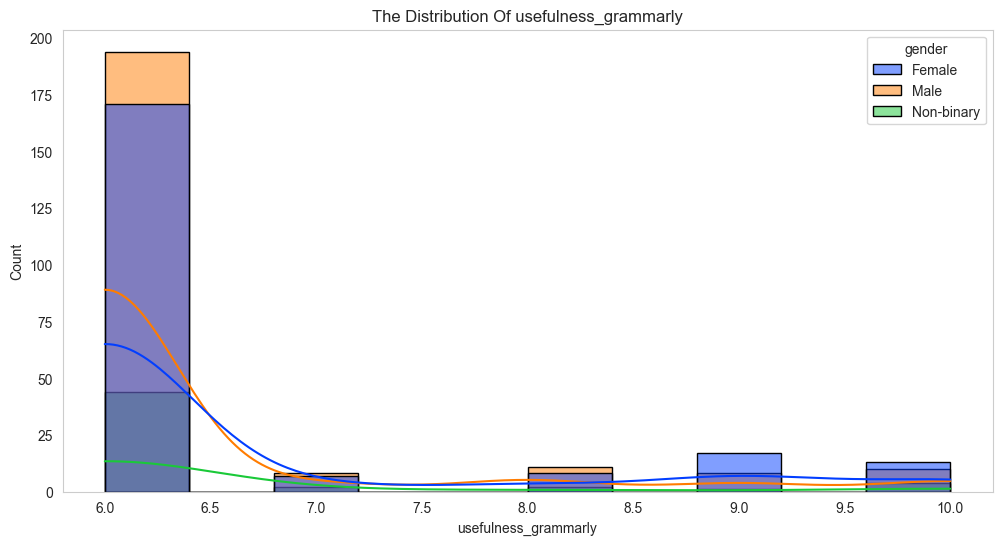

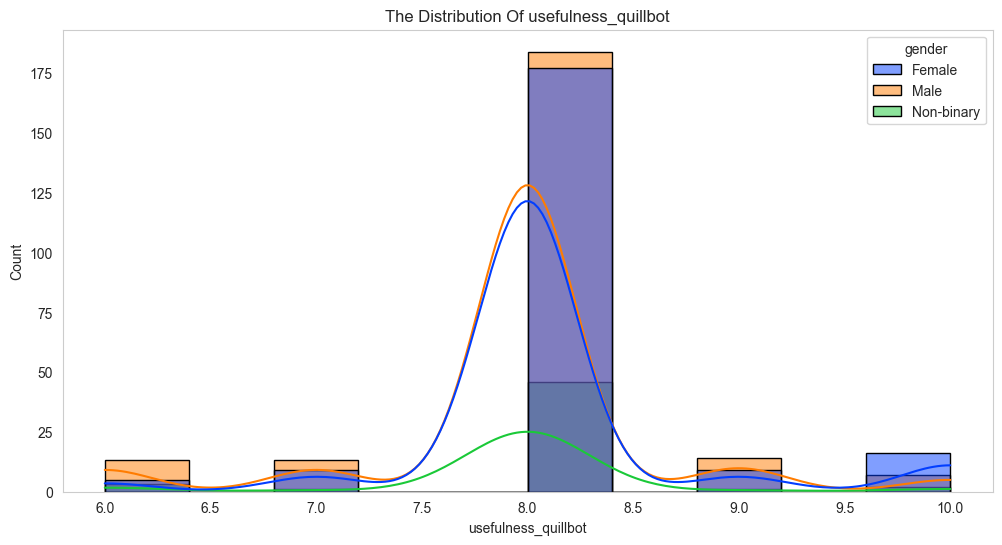

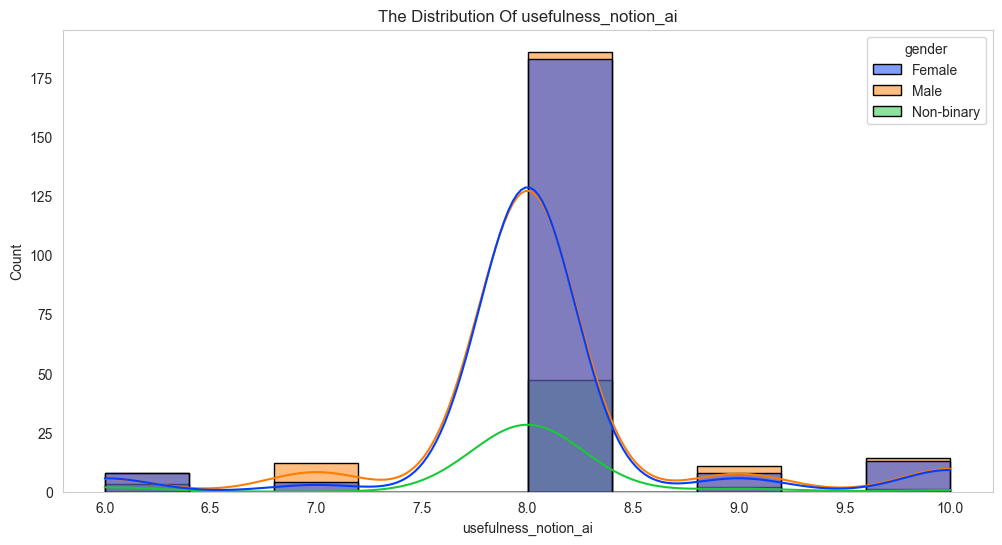

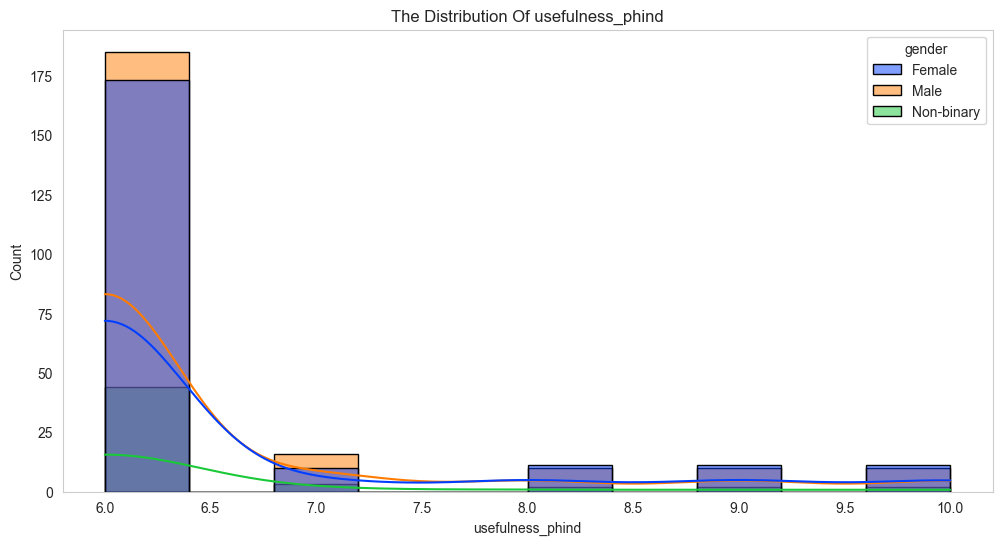

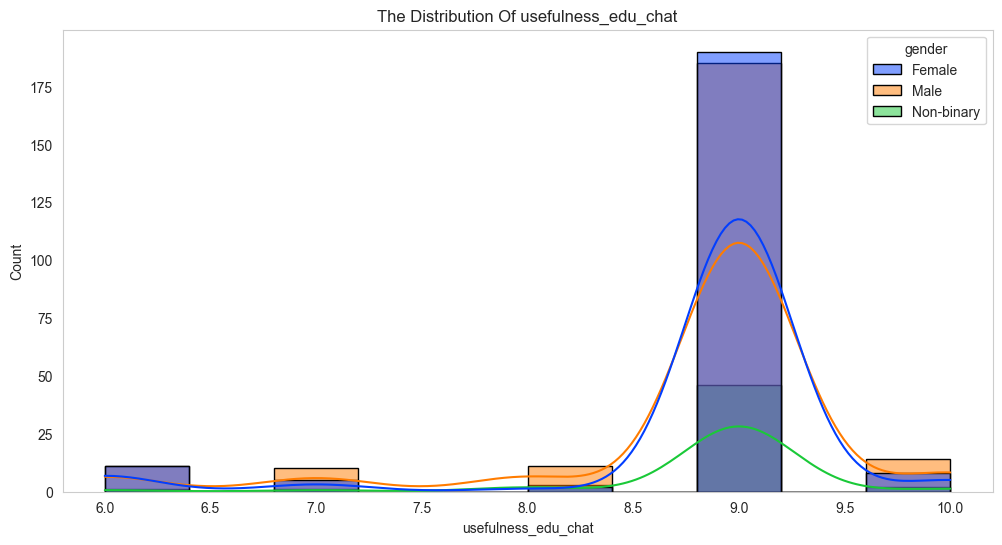

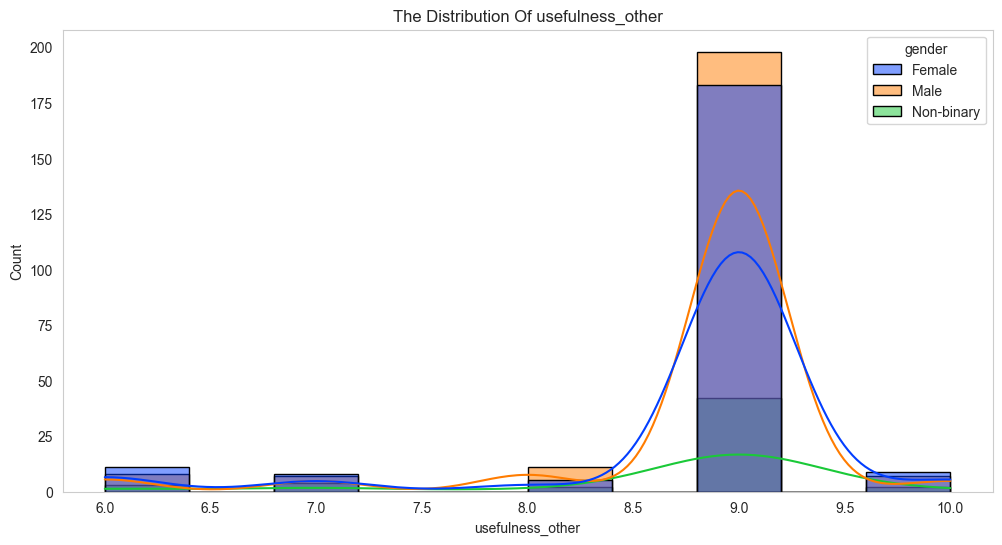

In [242]:
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="gender",palette="bright",edgecolor="black")
    plt.title(f"The Distribution Of {col}")
    plt.grid()
    plt.show()

## Categorical Classification By Gender 

In [243]:
df.columns

Index(['age', 'gender', 'country', 'grade', 'uses_ai_for_study',
       'uses_chatgpt', 'uses_gemini', 'uses_grammarly', 'uses_quillbot',
       'uses_notion_ai', 'uses_phind', 'uses_edu_chat', 'uses_other',
       'usefulness_chatgpt', 'usefulness_gemini', 'usefulness_grammarly',
       'usefulness_quillbot', 'usefulness_notion_ai', 'usefulness_phind',
       'usefulness_edu_chat', 'usefulness_other'],
      dtype='object')

In [244]:
classifi_tf=df.groupby(['age', 'gender', 'country', 'grade', 'uses_ai_for_study',
       'uses_chatgpt', 'uses_gemini', 'uses_grammarly', 'uses_quillbot',
       'uses_notion_ai', 'uses_phind', 'uses_edu_chat', 'uses_other',]).size().reset_index(name="count")
classifi_tf

,age,gender,country,grade,uses_ai_for_study,uses_chatgpt,uses_gemini,uses_grammarly,uses_quillbot,uses_notion_ai,uses_phind,uses_edu_chat,uses_other,count
0,14,Female,Australia,11th,True,False,False,False,True,True,False,False,False,1
1,14,Female,Australia,11th,True,False,False,True,True,True,True,True,True,1
2,14,Female,Australia,12th,True,False,False,False,False,False,False,False,False,1
3,14,Female,Australia,12th,True,False,True,False,False,True,False,True,False,1
4,14,Female,Australia,9th,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,18,Non-binary,India,12th,False,False,False,False,False,False,False,False,False,1
487,18,Non-binary,India,12th,True,True,False,True,False,False,False,False,False,1
488,18,Non-binary,Japan,12th,False,False,False,False,False,False,False,False,False,1
489,18,Non-binary,Japan,9th,False,False,False,False,False,False,False,False,False,1


Text(0.5, 0.98, 'AI Usage For Study by Gender Across Countries')

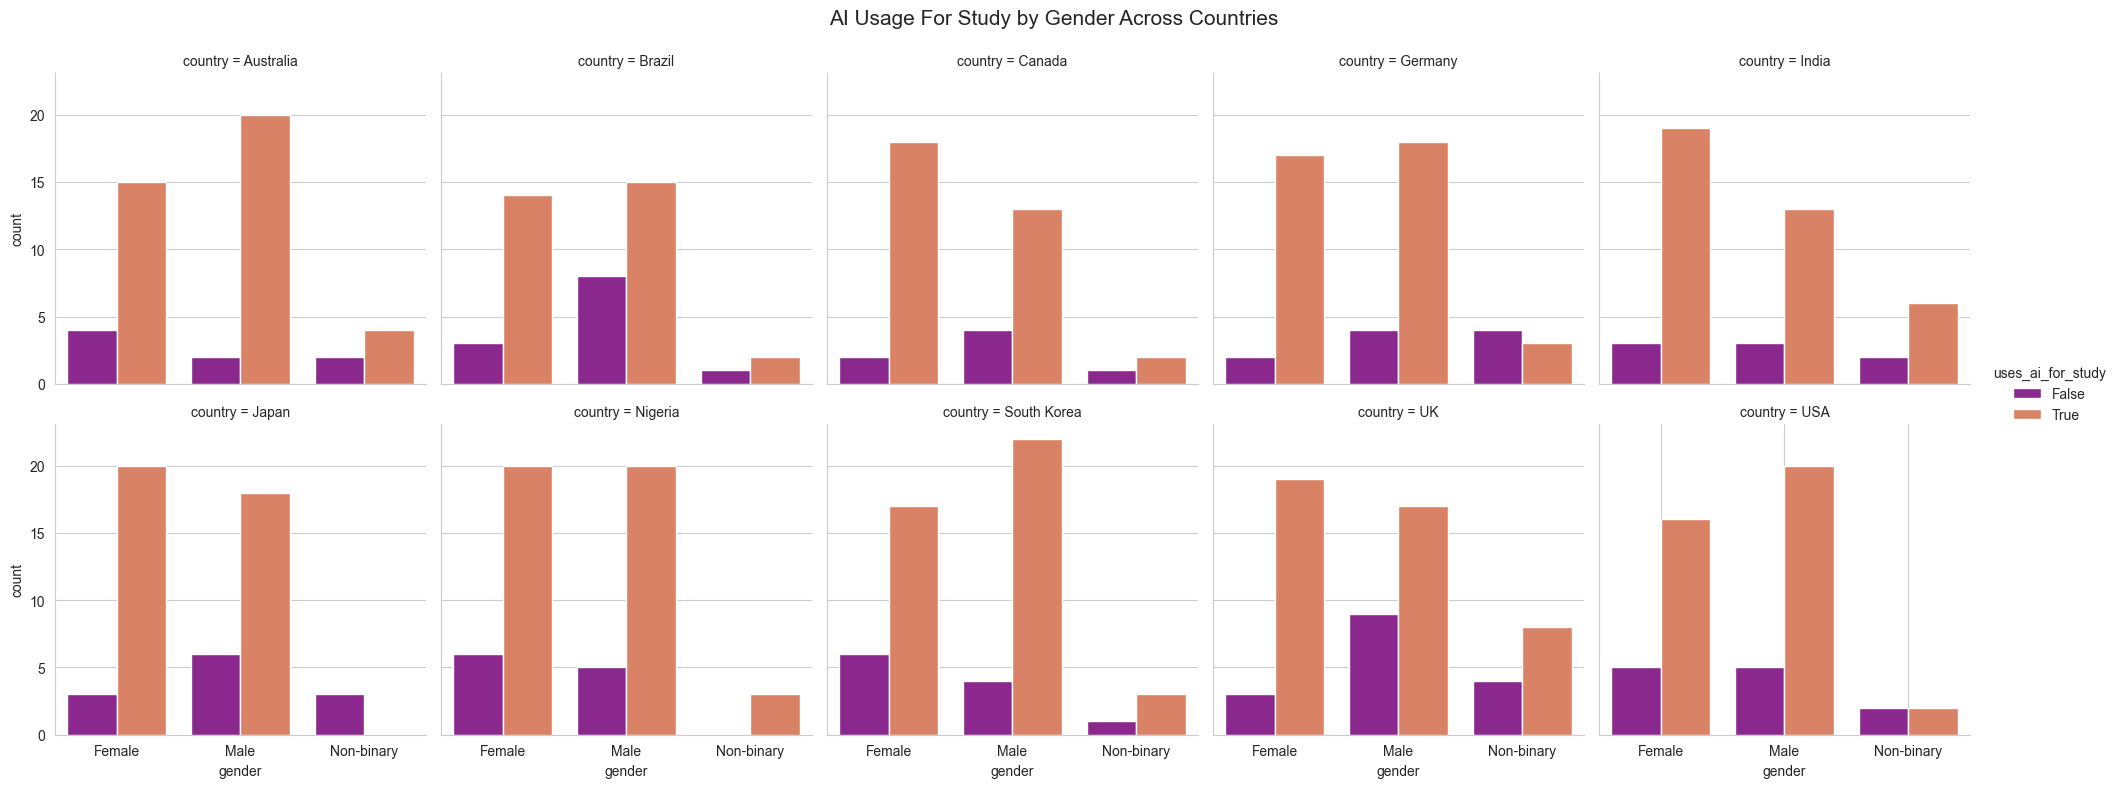

In [245]:
g = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_ai_for_study",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="plasma",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("AI Usage For Study by Gender Across Countries",size=15)


Text(0.5, 0.98, 'Chat GPT Usage by Gender Across Countries')

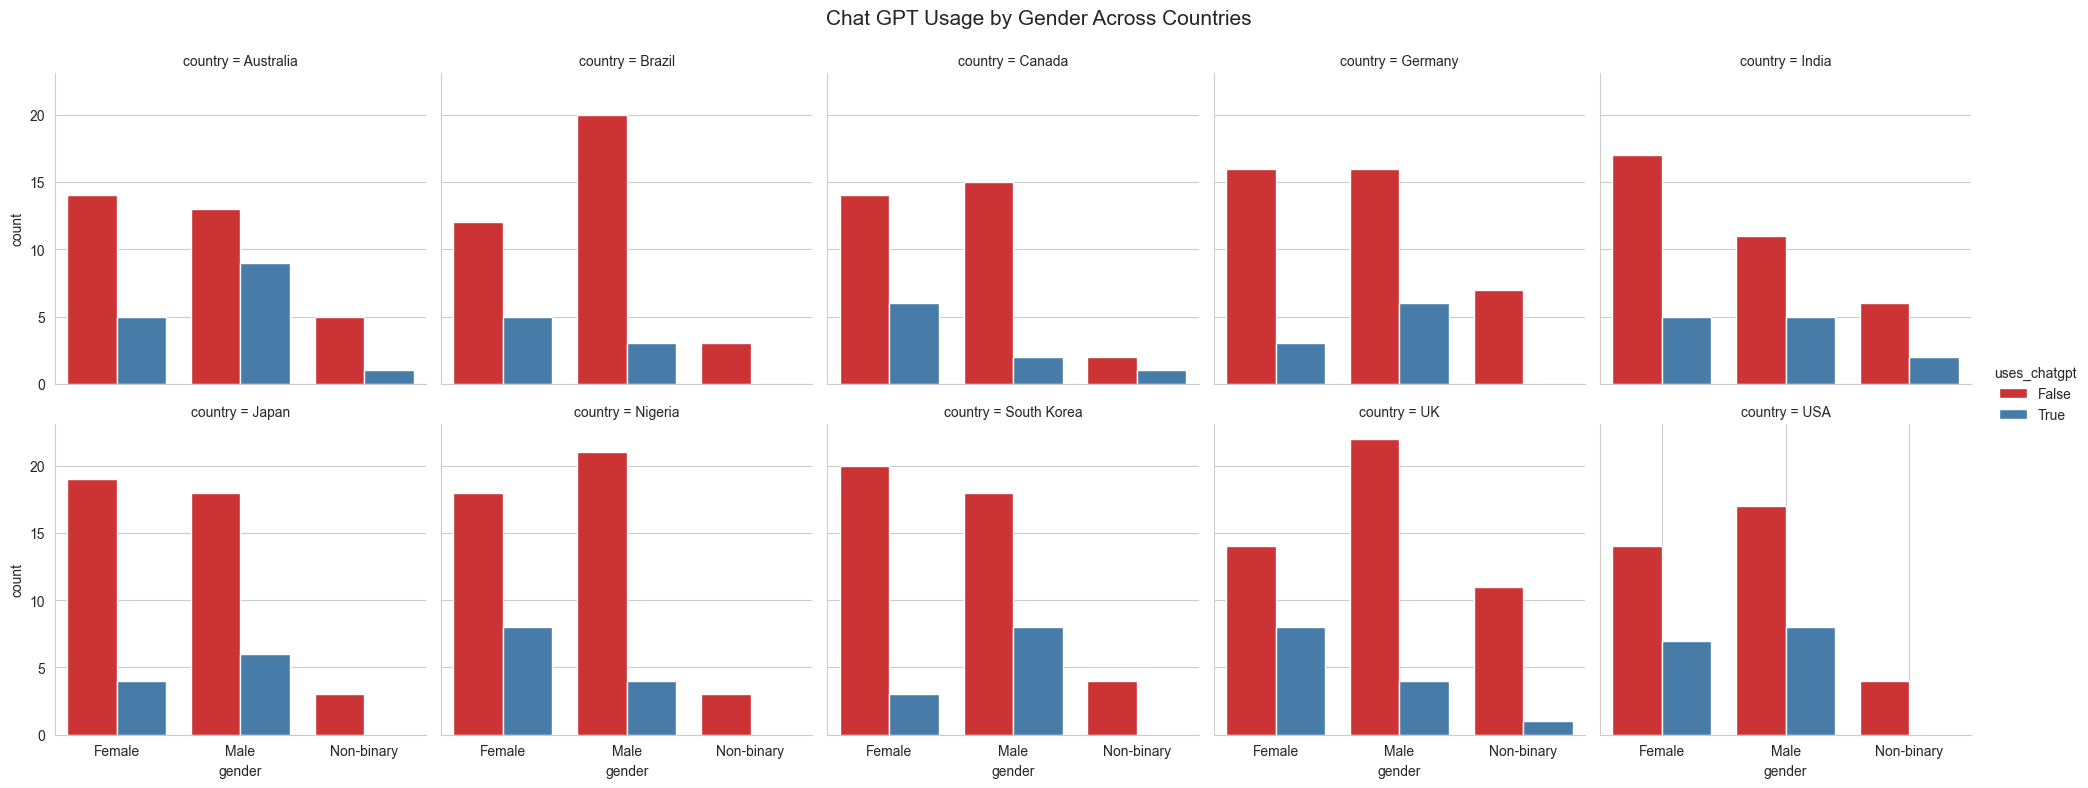

In [246]:
h = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_chatgpt",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="Set1",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Chat GPT Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, 'Gemini Usage by Gender Across Countries')

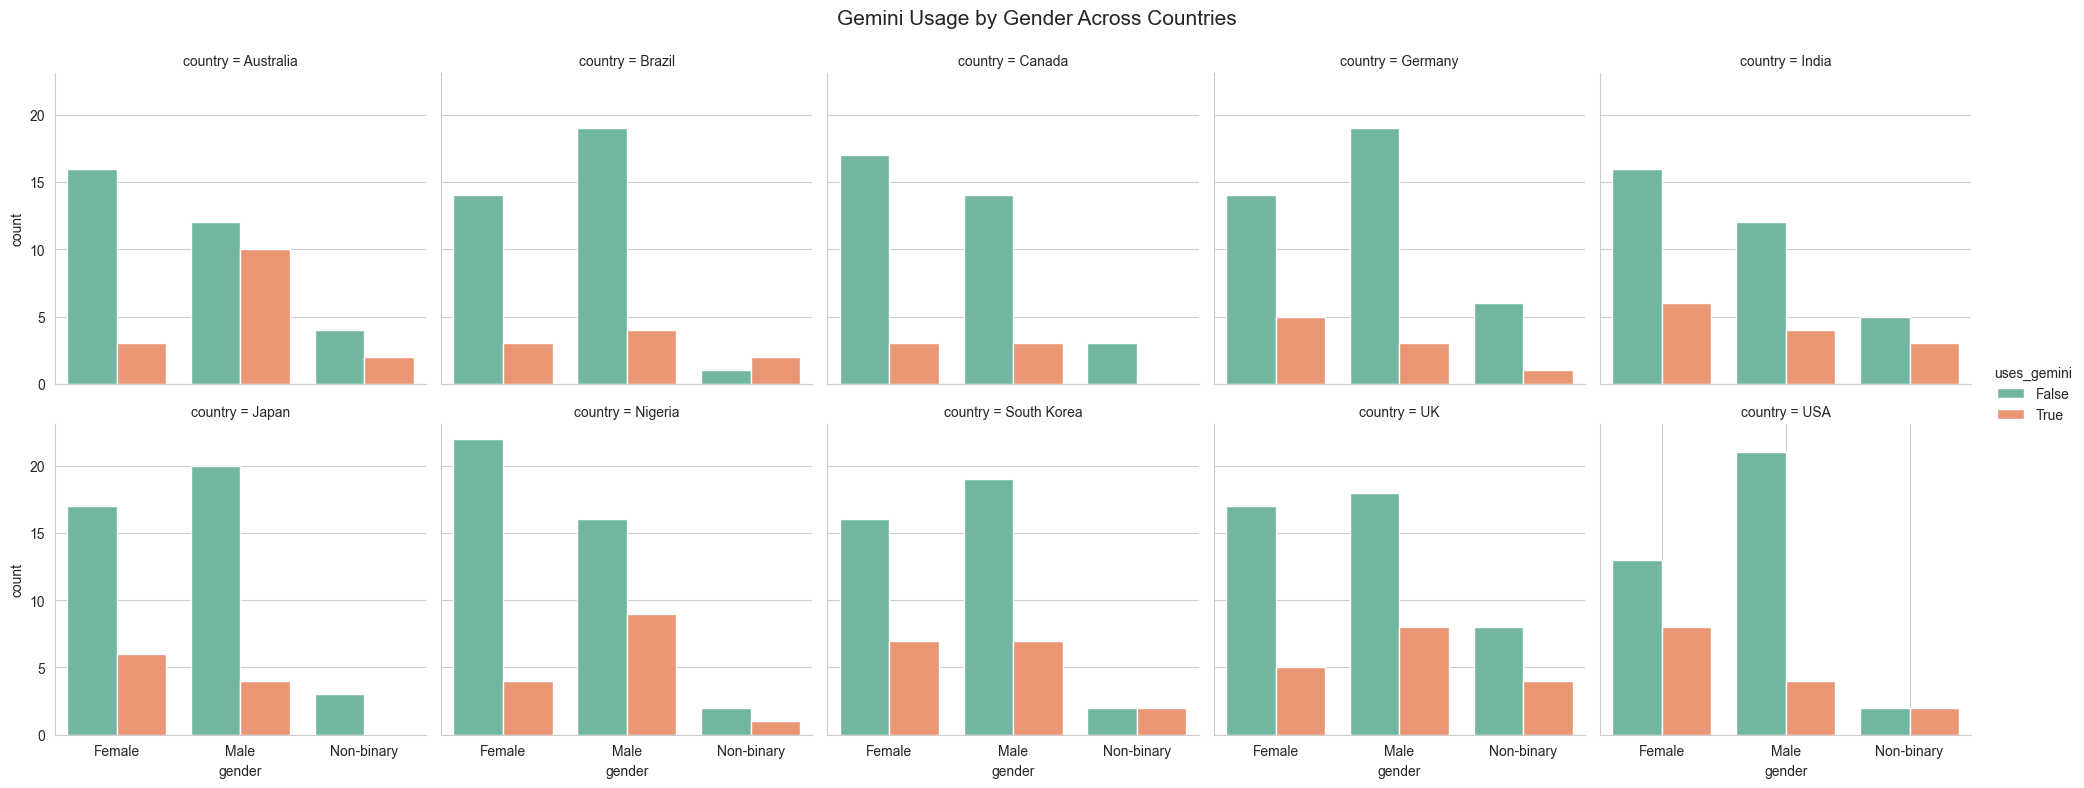

In [247]:
i = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_gemini",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="Set2",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Gemini Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, 'Grammarly Usage by Gender Across Countries')

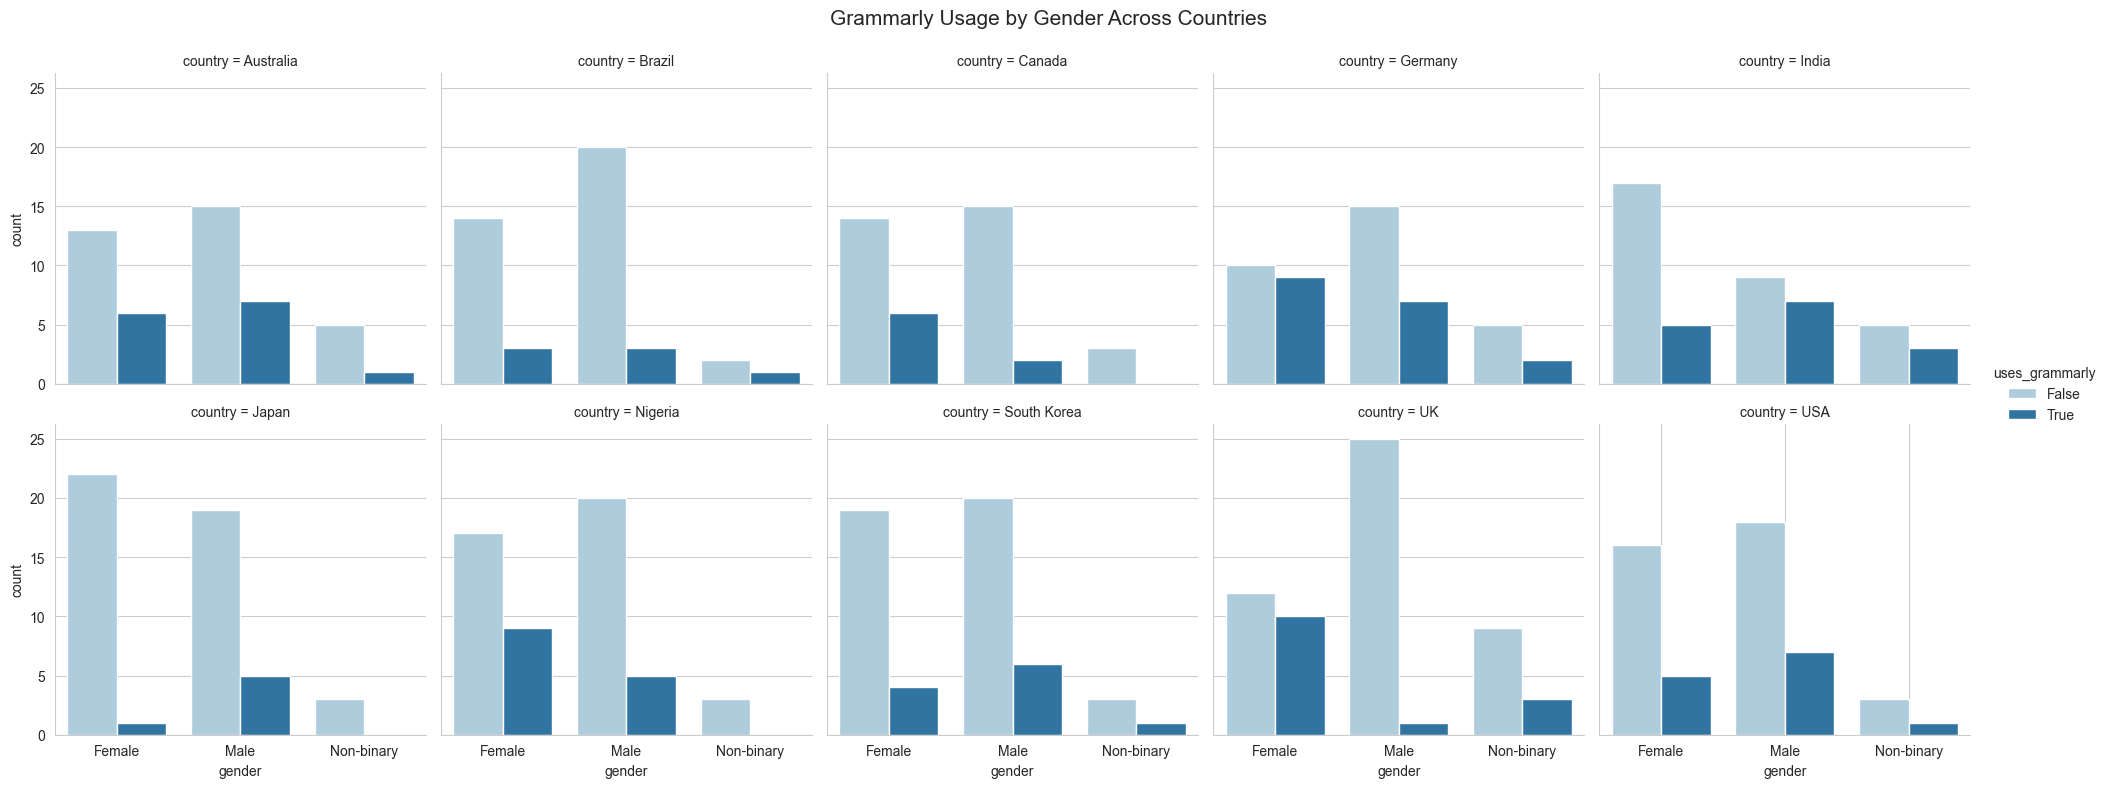

In [248]:
j = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_grammarly",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="Paired",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Grammarly Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, 'Quillbot Usage by Gender Across Countries')

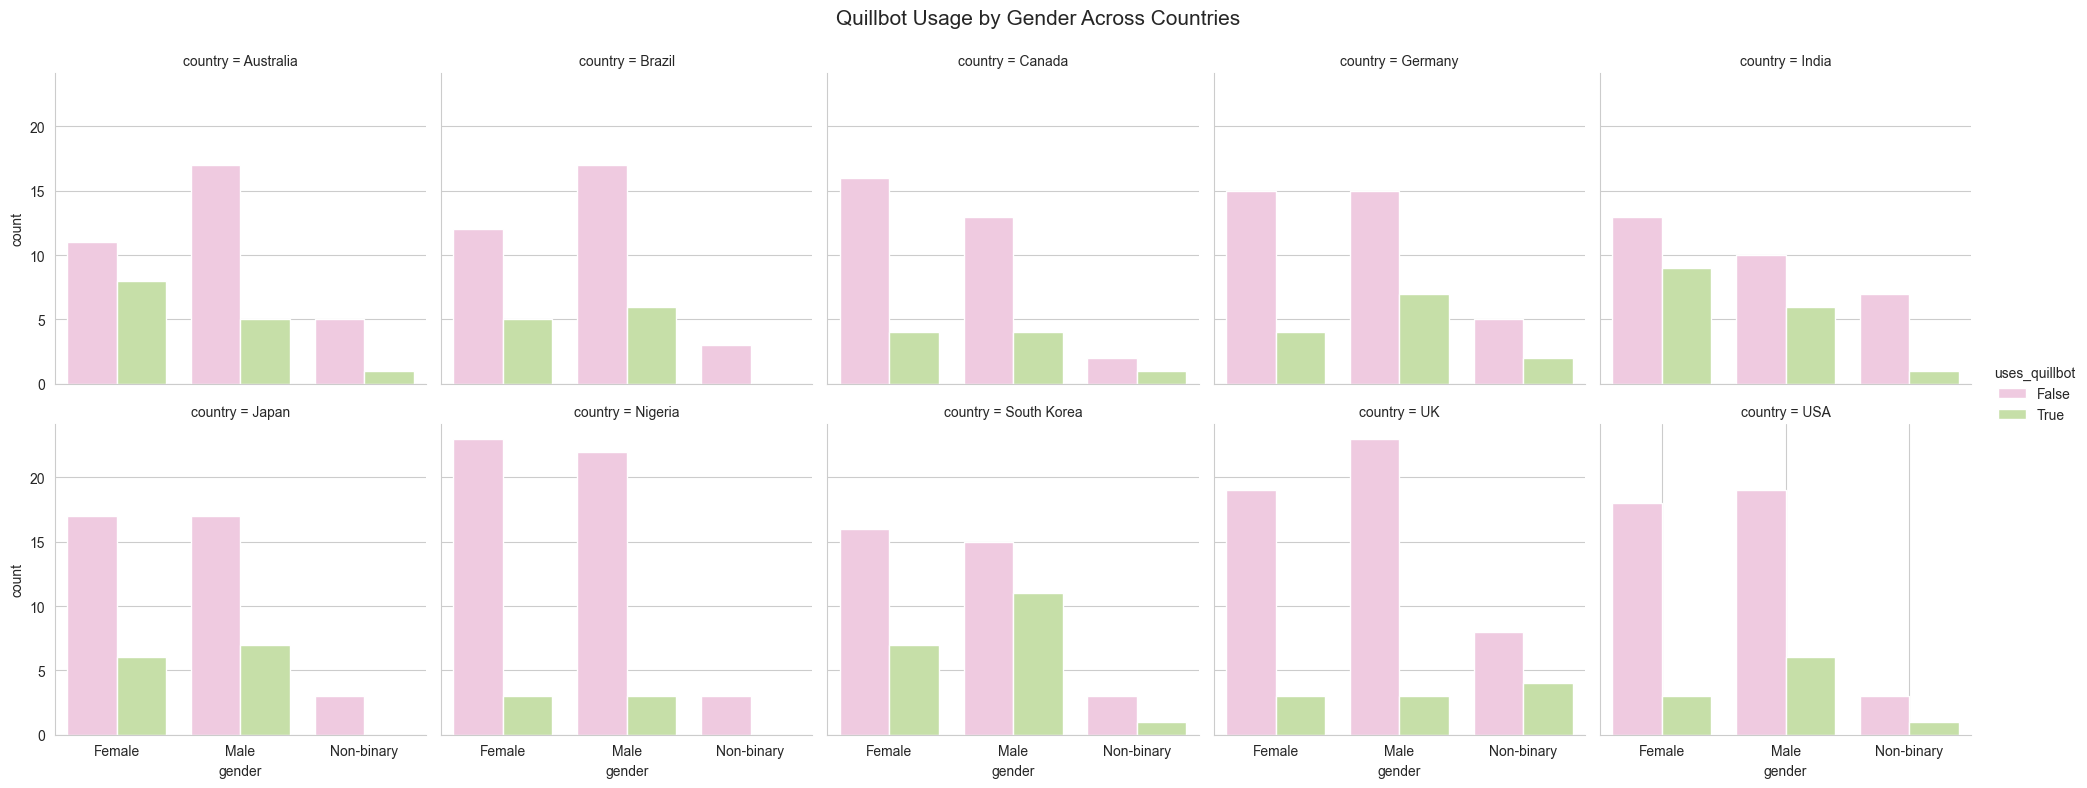

In [249]:
k = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_quillbot",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="PiYG",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Quillbot Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, 'Notion Ai Usage by Gender Across Countries')

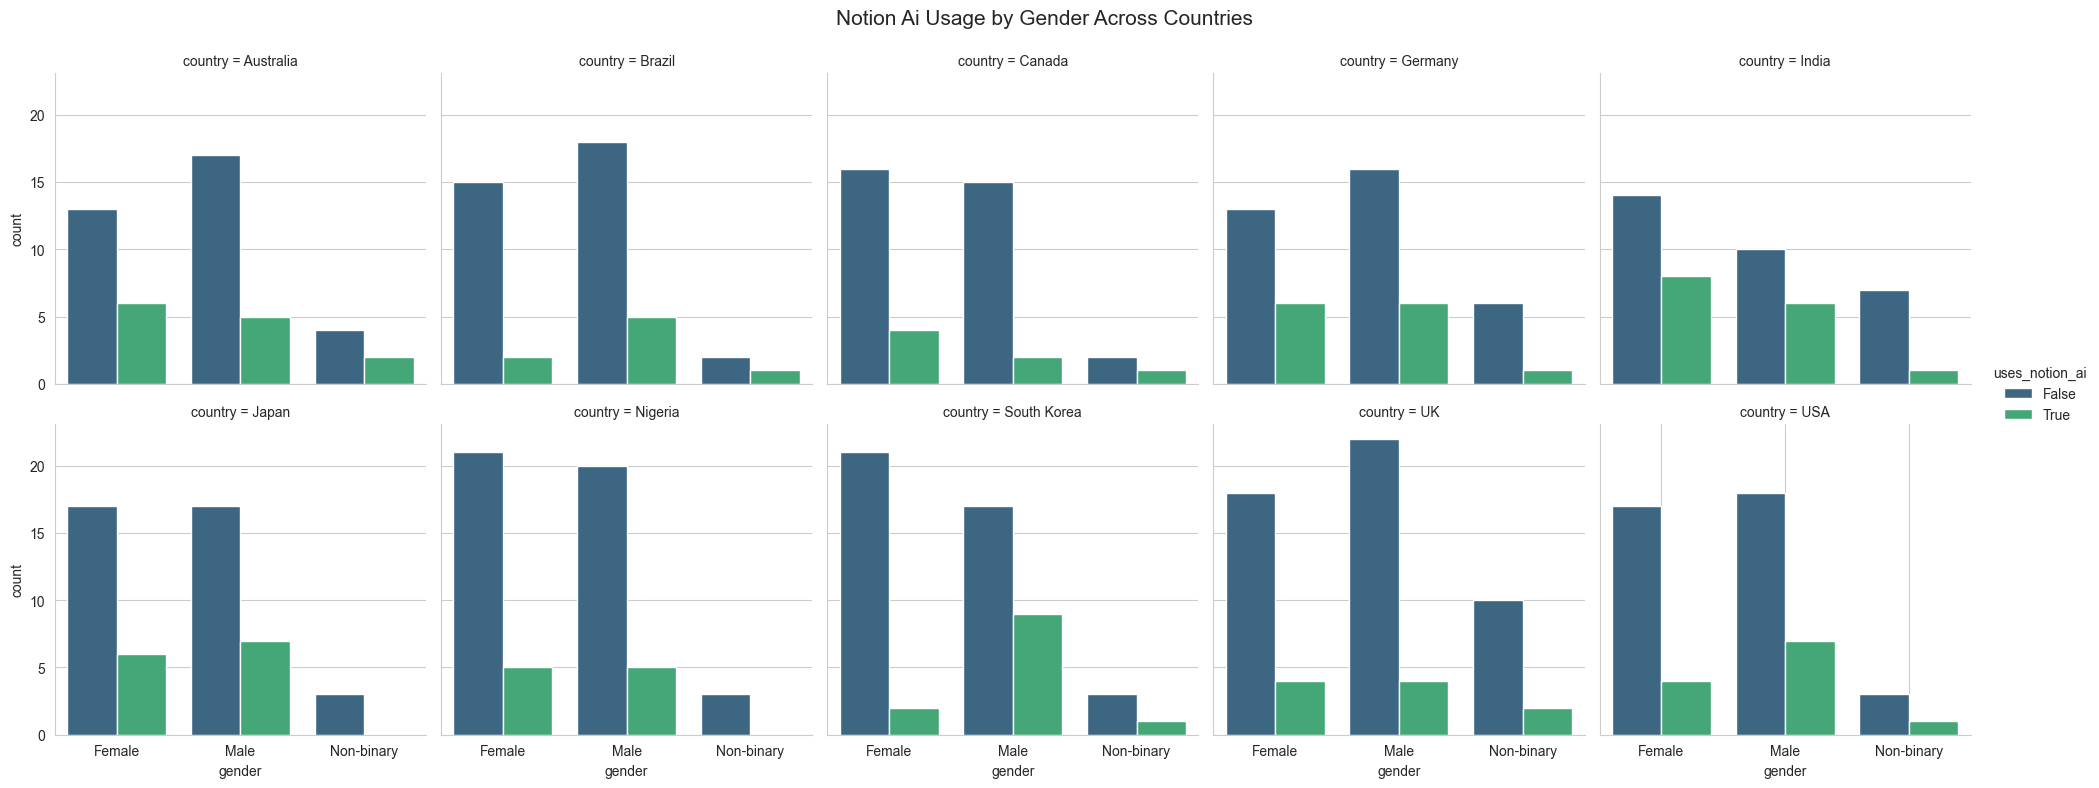

In [250]:
l = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_notion_ai",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="viridis",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Notion Ai Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, 'Phind Usage by Gender Across Countries')

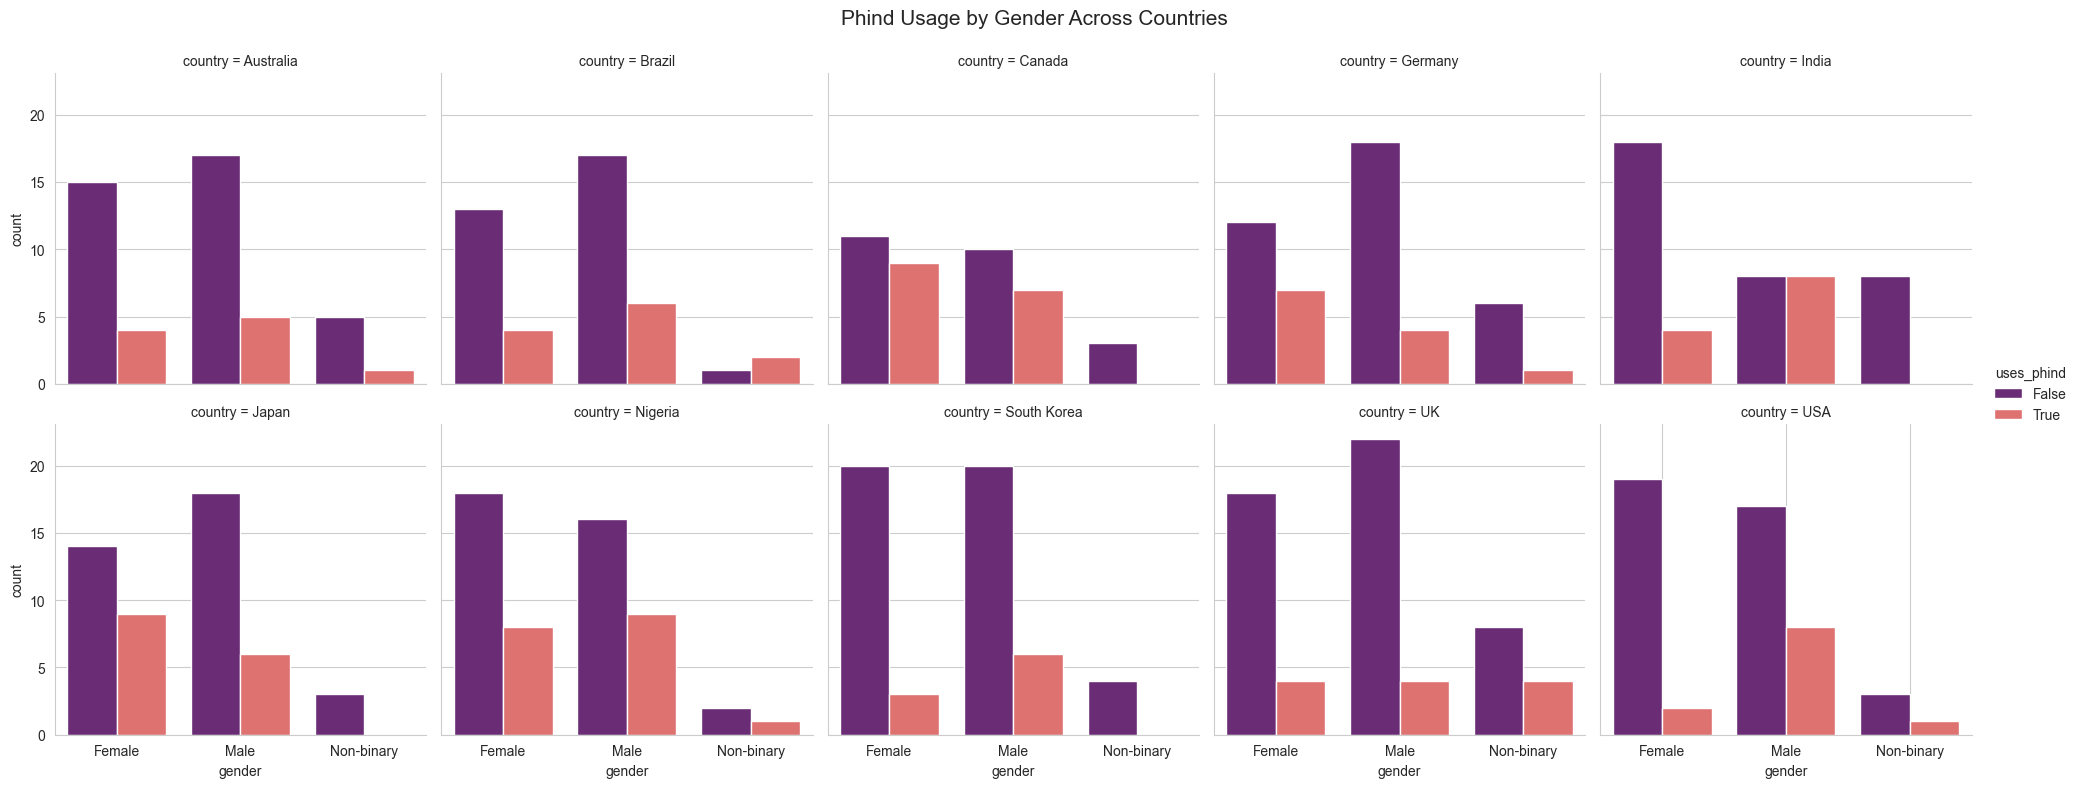

In [251]:
m = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_phind",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="magma",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Phind Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, 'Edu Chat Usage by Gender Across Countries')

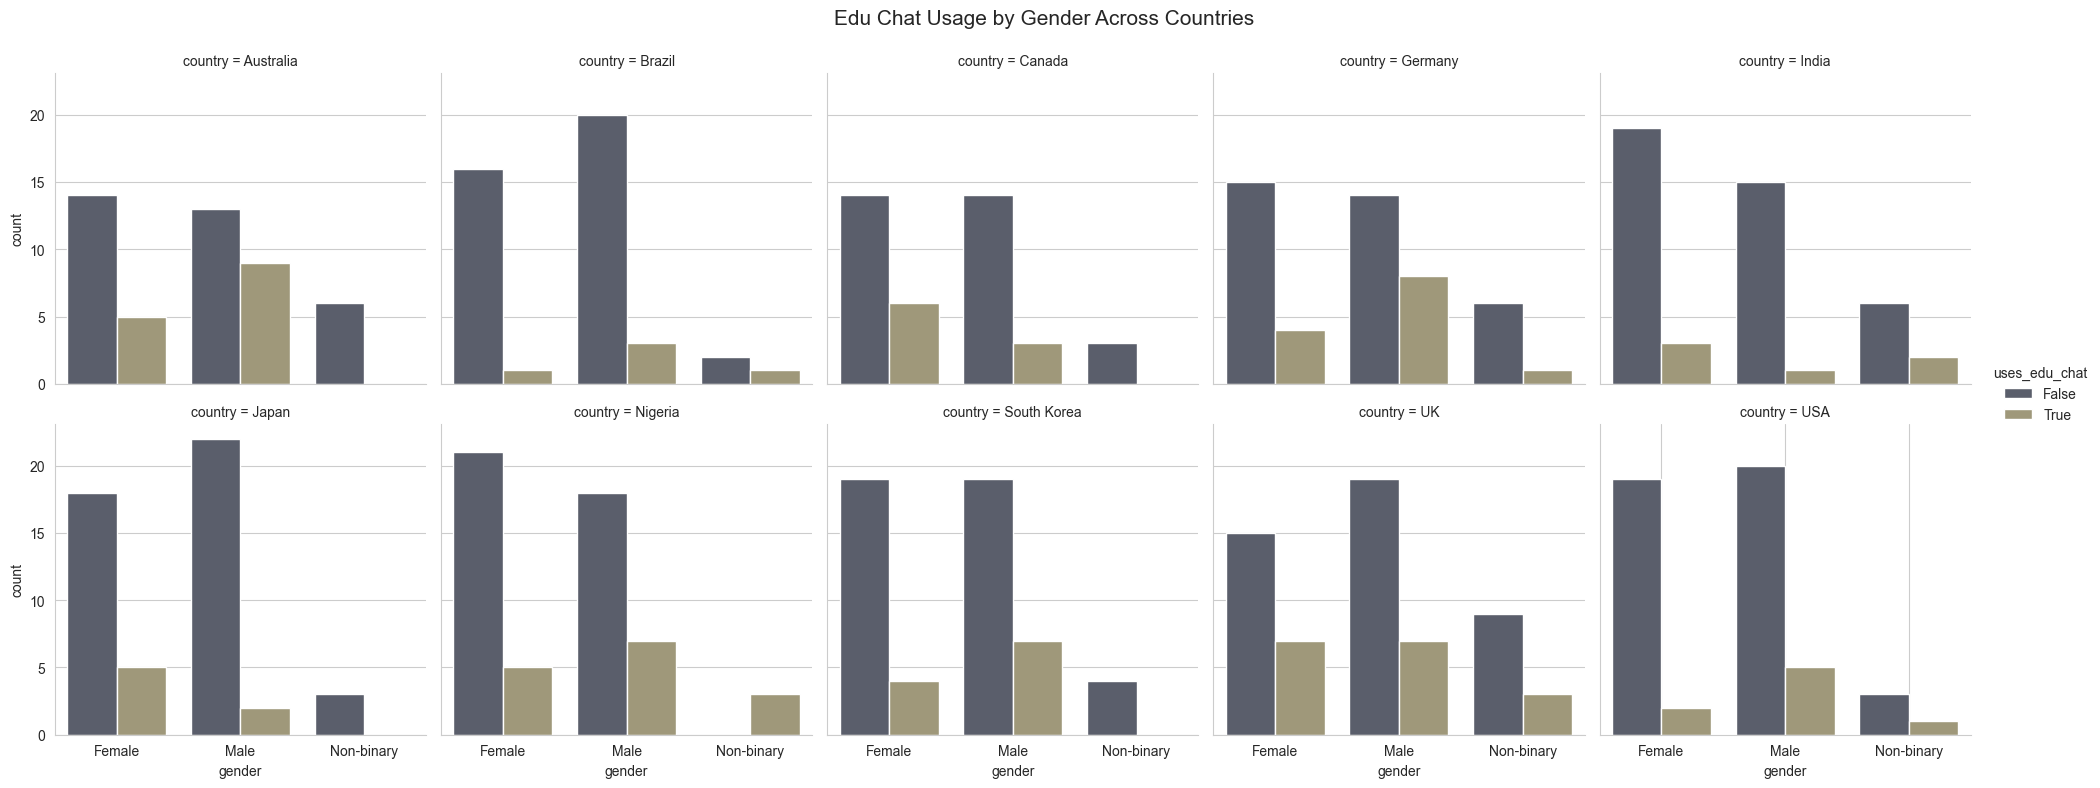

In [252]:
n = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_edu_chat",
    col="country",
    kind="count",
    col_wrap=5,  # Adjust this depending on number of countries
    palette="cividis",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle("Edu Chat Usage by Gender Across Countries",size=15)

Text(0.5, 0.98, ' Other AI Usage by Gender Across Countries')

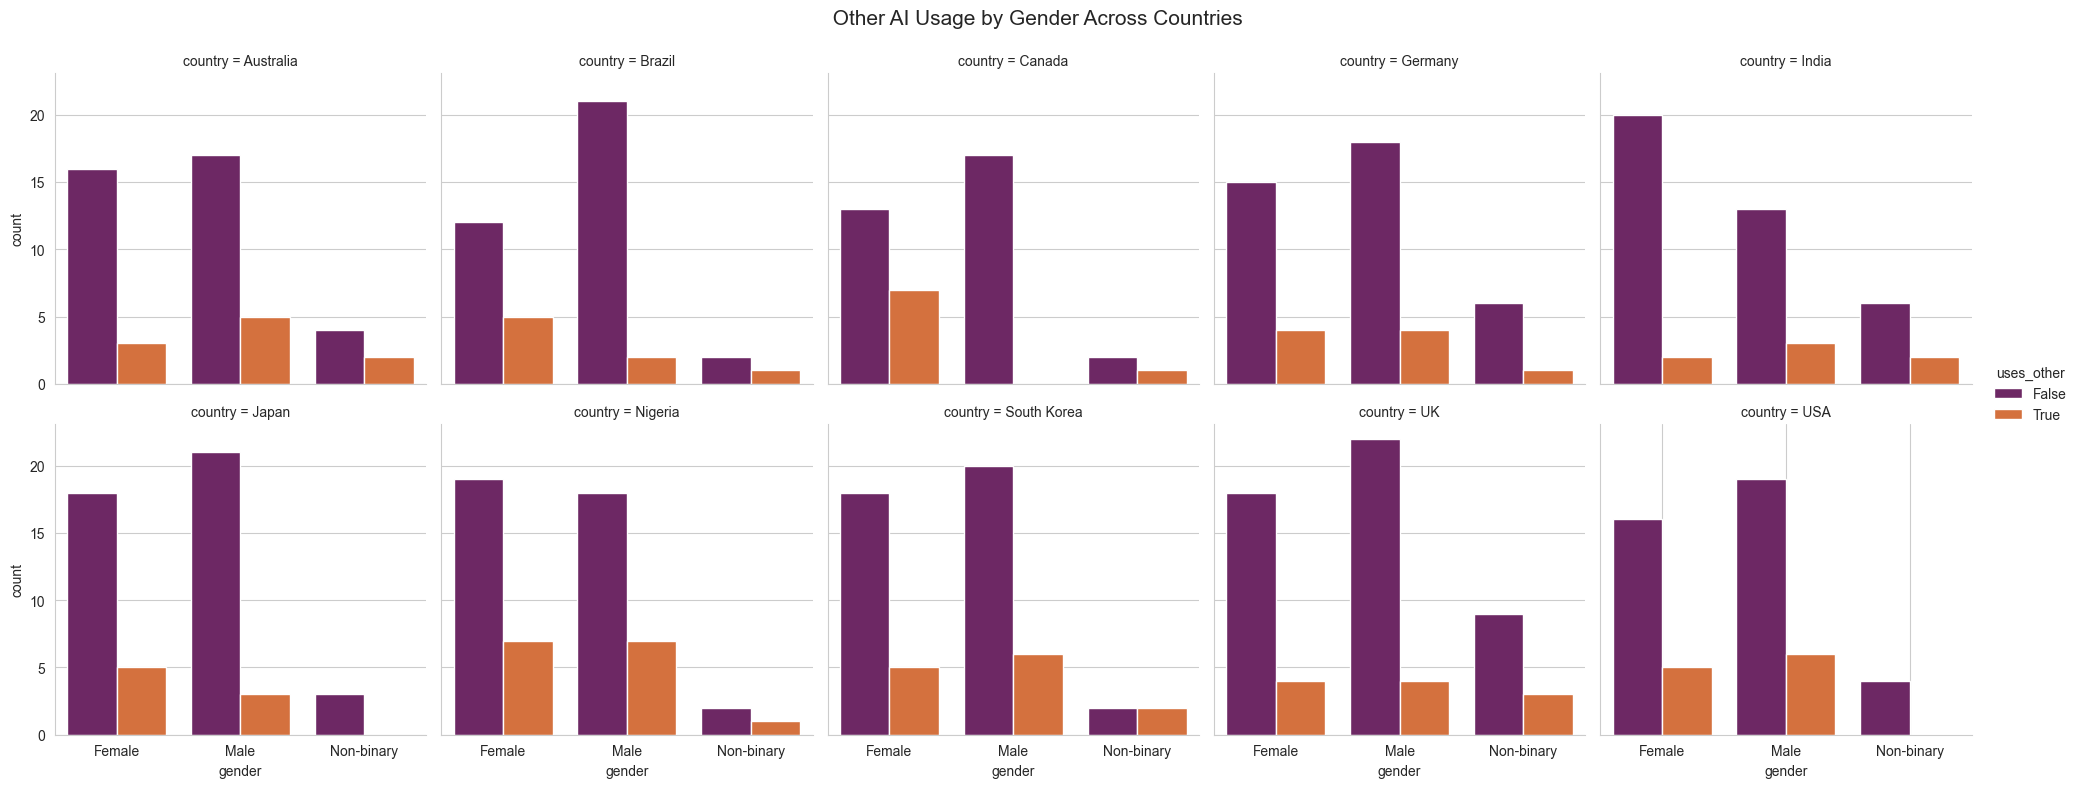

In [253]:
o = sns.catplot(
    data=classifi_tf,
    x="gender",
    hue="uses_other",
    col="country",
    kind="count",
    col_wrap=5,  
    palette="inferno",
    height=4
)
sns.set_style("whitegrid")
plt.grid()
plt.subplots_adjust(top=0.9)
plt.suptitle(" Other AI Usage by Gender Across Countries",size=15)

In [254]:
df.head()

,age,gender,country,grade,uses_ai_for_study,uses_chatgpt,uses_gemini,uses_grammarly,uses_quillbot,uses_notion_ai,uses_phind,uses_edu_chat,uses_other,usefulness_chatgpt,usefulness_gemini,usefulness_grammarly,usefulness_quillbot,usefulness_notion_ai,usefulness_phind,usefulness_edu_chat,usefulness_other
0,17,Female,India,12th,True,False,False,False,False,True,False,False,True,9.0,8.0,6.0,8.0,6.0,6.0,9.0,6.0
1,18,Female,Canada,10th,True,False,True,False,True,False,False,False,False,9.0,9.0,6.0,10.0,8.0,6.0,9.0,9.0
2,16,Male,UK,12th,False,False,False,False,False,False,False,False,False,9.0,8.0,6.0,8.0,8.0,6.0,9.0,9.0
3,18,Female,UK,10th,False,False,False,False,False,False,False,False,False,9.0,8.0,6.0,8.0,8.0,6.0,9.0,9.0
4,18,Male,USA,11th,True,False,False,True,False,False,False,True,False,9.0,8.0,10.0,8.0,8.0,6.0,8.0,9.0


In [255]:
bins = [13, 15, 17, 19]  # edges: 14-15, 16-17, 18
labels = ['14-15', '16-17', '18+']

# Add age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df)

     age  gender      country grade  uses_ai_for_study  uses_chatgpt  \
0     17  Female        India  12th               True         False   
1     18  Female       Canada  10th               True         False   
2     16    Male           UK  12th              False         False   
3     18  Female           UK  10th              False         False   
4     18    Male          USA  11th               True         False   
..   ...     ...          ...   ...                ...           ...   
495   14  Female      Nigeria   9th               True         False   
496   16    Male           UK  10th               True         False   
497   14    Male  South Korea   9th               True         False   
498   14    Male  South Korea  11th               True         False   
499   14    Male           UK  10th               True         False   

     uses_gemini  uses_grammarly  uses_quillbot  uses_notion_ai  uses_phind  \
0          False           False          False         

In [256]:
df.head()

,age,gender,country,grade,uses_ai_for_study,uses_chatgpt,uses_gemini,uses_grammarly,uses_quillbot,uses_notion_ai,uses_phind,uses_edu_chat,uses_other,usefulness_chatgpt,usefulness_gemini,usefulness_grammarly,usefulness_quillbot,usefulness_notion_ai,usefulness_phind,usefulness_edu_chat,usefulness_other,age_group
0,17,Female,India,12th,True,False,False,False,False,True,False,False,True,9.0,8.0,6.0,8.0,6.0,6.0,9.0,6.0,18+
1,18,Female,Canada,10th,True,False,True,False,True,False,False,False,False,9.0,9.0,6.0,10.0,8.0,6.0,9.0,9.0,18+
2,16,Male,UK,12th,False,False,False,False,False,False,False,False,False,9.0,8.0,6.0,8.0,8.0,6.0,9.0,9.0,16-17
3,18,Female,UK,10th,False,False,False,False,False,False,False,False,False,9.0,8.0,6.0,8.0,8.0,6.0,9.0,9.0,18+
4,18,Male,USA,11th,True,False,False,True,False,False,False,True,False,9.0,8.0,10.0,8.0,8.0,6.0,8.0,9.0,18+


## Which Gender,Age Group And What Grade Uses Ai For Study 

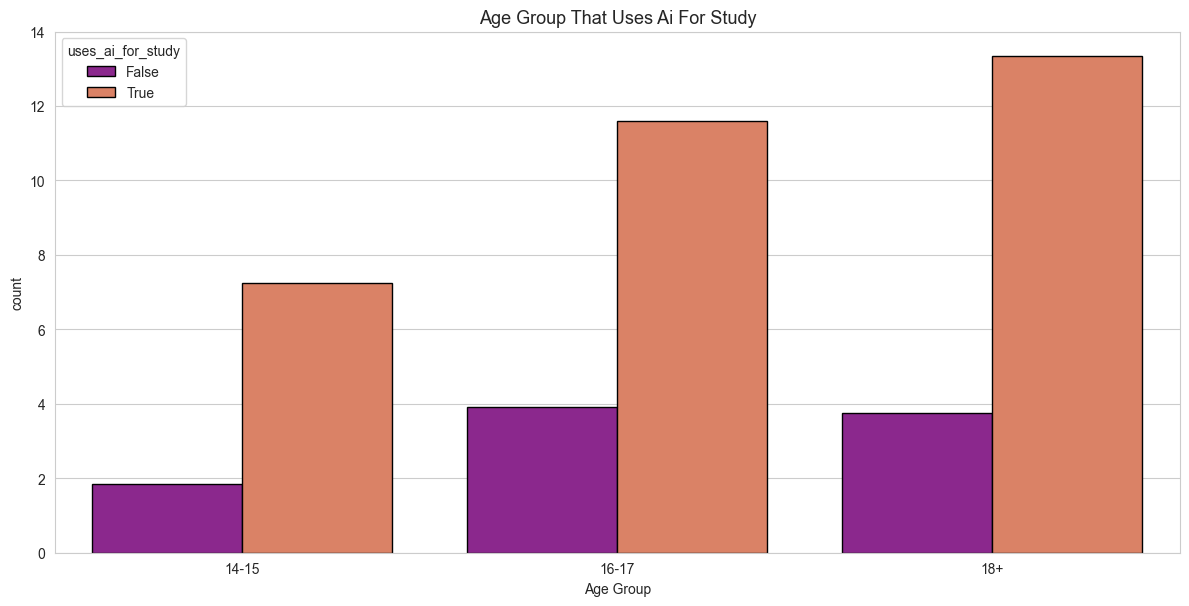

In [257]:
classifi_ai=df.groupby(["gender","grade","age_group","uses_ai_for_study"]).size().reset_index(name="count")
classifi_ai=classifi_ai.sort_values("count",ascending=False)
classifi_ai
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_ai,x="age_group",y="count",hue="uses_ai_for_study",edgecolor="black",ci=None,palette="plasma")
plt.tight_layout()
plt.title("Age Group That Uses Ai For Study",size=13)
plt.xlabel("Age Group",size=10)
plt.show()

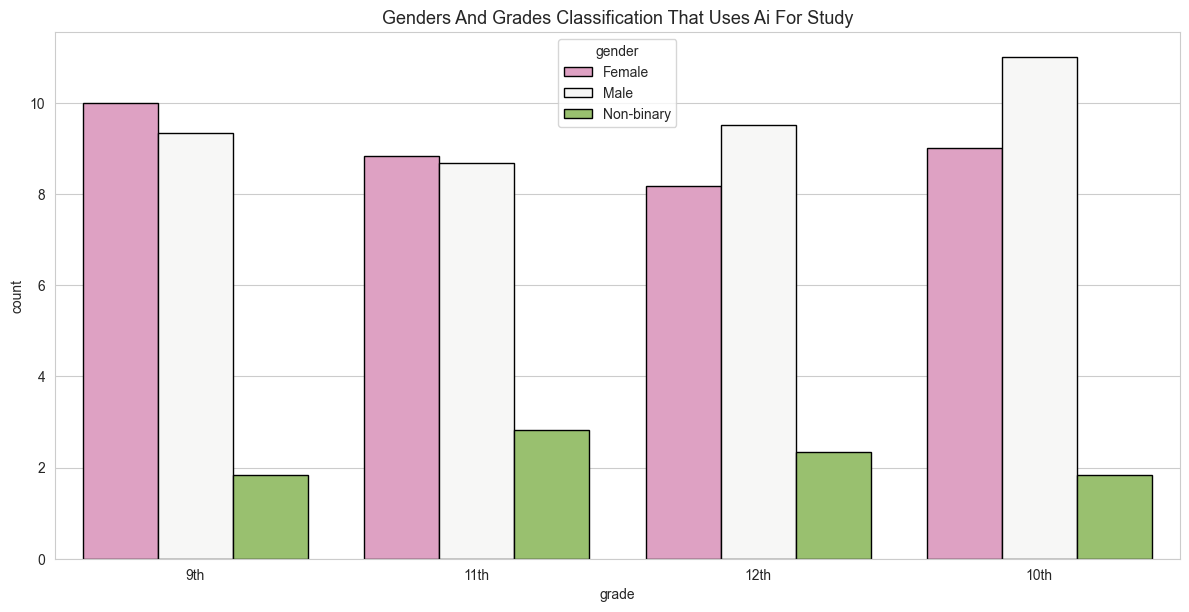

In [258]:
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_ai,x="grade",y="count",hue="gender",edgecolor="black",ci=None,palette="PiYG")
plt.tight_layout()
plt.title("Genders And Grades Classification That Uses Ai For Study",size=13)
plt.show()

## Correlation Heatmap

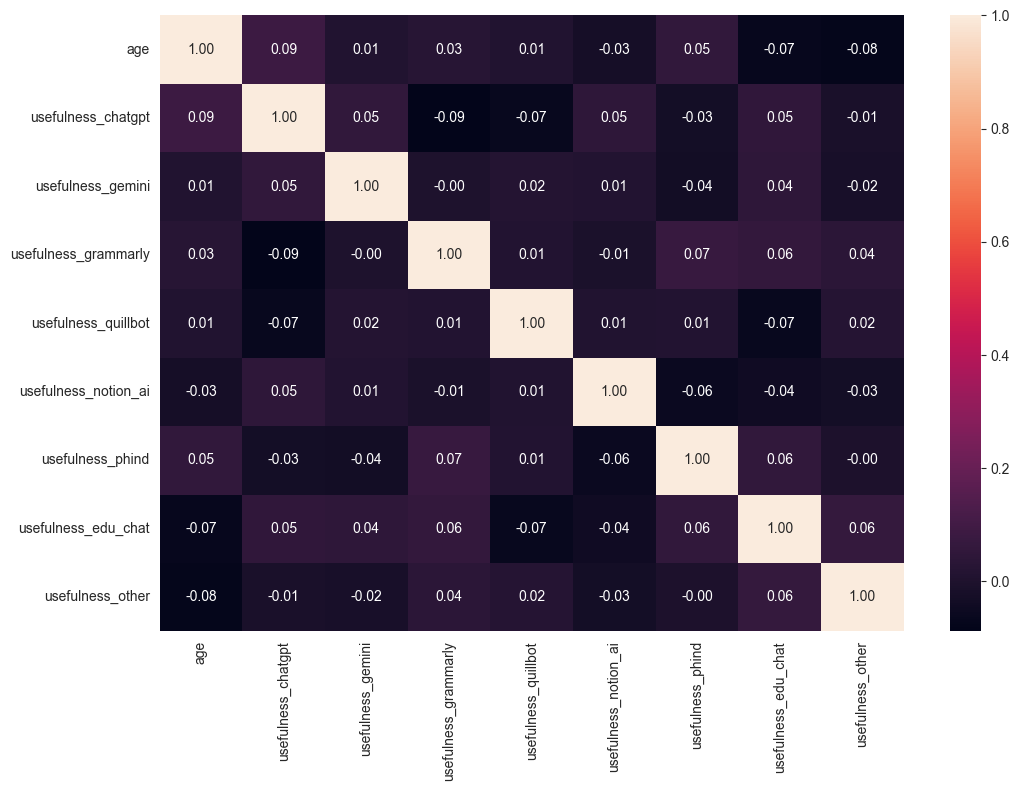

In [259]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()